# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [6]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [7]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [8]:
hemisferios=[]
for i in df["Latitude"]:
    if i >=0:
        hemisferios.append("Norte")
    else:
        hemisferios.append("Sul")
df["Hemisferios"]=hemisferios
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferios
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

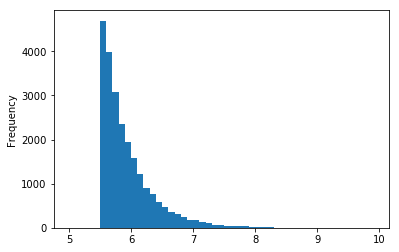

In [9]:
faixa=np.arange(5,10,0.1)
df.Magnitude.plot.hist(bins=faixa)

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [10]:
media=df["Magnitude"].mean()
desvio=df["Magnitude"].std()
print(media)
print(desvio)

5.882530753460003
0.4230656393157772


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

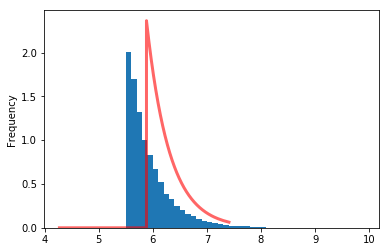

In [11]:
import scipy
x=sorted(stats.norm.rvs(size=10000, loc=media, scale=desvio))
plot = df.Magnitude.plot.hist(bins=faixa,normed=1,sharex=True, sharey=True)
plt.plot(x,stats.expon.pdf(x,loc=media,scale=desvio),lw=3,alpha=0.6,color="red")
plt.show()

O fit faz com que o topo da exponêncial seja a média e decaia com seu devio padrão

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [18]:
cross=pd.crosstab(df["Type"],df["Hemisferios"], margins=True,normalize="index")*100
cross

Hemisferios,Norte,Sul
Type,,
Earthquake,45.062844,54.937156
Explosion,50.000000,50.000000
Nuclear Explosion,84.000000,16.000000
Rock Burst,0.000000,100.000000
All,45.352811,54.647189


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [19]:
probN=45.062/100
probN

0.45061999999999997

Explique o seu raciocínio

p(Nort)/p(ALL)=probabilidade de acontecer no Norte

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [28]:
a=147/10618
print(a*100)
resposta=("1.38% de chance")
print(resposta)

1.3844415144094933
1.38% de chance


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

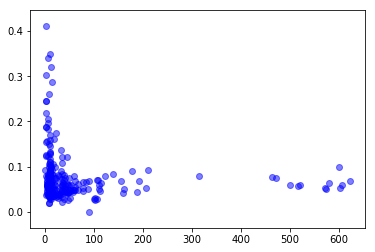

In [29]:
todos = plt.scatter(x=df["Depth"],y=df["Magnitude Error"],c="blue",alpha=0.5)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [30]:
df.corr(method="pearson", min_periods=1)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778


Explique o que significa o valor da correlação calculada acima? 

Significa que a cada  1 Magnitude Error Depht cai em 0.07 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


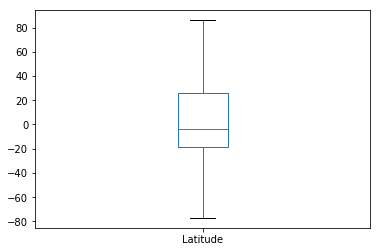

In [31]:
lat=df["Latitude"].describe()
print(lat)
plot = df.Latitude.plot(kind="box")

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


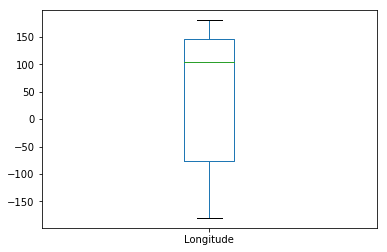

In [32]:
long=df["Longitude"].describe()
print(long)
plot = df.Longitude.plot(kind="box")

Nos Gráficos de boxplot, a linha verde marca a média das latitudes e longitudes onde aconteçem mais terremotos, ou seja os páises que mais aprensentam terremotos sao aqueles que possuem a latitude entre 0 e -20 e a longitude proxima dos 100 gráus.Ou seja nos países asiáticos.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [33]:
fon=pd.crosstab(df["Magnitude Type"],df["Hemisferios"],normalize="index")*100
fon.round(decimals=1)

Hemisferios,Norte,Sul
Magnitude Type,,
MB,44.8,55.2
MD,100.0,0.0
MH,100.0,0.0
ML,100.0,0.0
MS,45.1,54.9
MW,47.7,52.3
MWB,45.2,54.8
MWC,42.1,57.9
MWR,46.2,53.8


In [34]:
pd.crosstab(df["Type"],df["Hemisferios"],normalize="index")*100

Hemisferios,Norte,Sul
Type,,
Earthquake,45.062844,54.937156
Explosion,50.000000,50.000000
Nuclear Explosion,84.000000,16.000000
Rock Burst,0.000000,100.000000


In [35]:
probNorte=(84*44.8)/100
print(probNorte)
probSul=(55.2*16)/100
print(probSul)

37.632
8.832


In [36]:
resposta=("E mais provavel que tenha sido no Norte")
print(resposta)

E mais provavel que tenha sido no Norte
